# Plot GeoTiffs


In this NoteBook the reader finds code to read a GeoTiff file, single- or multi-band, from HDFS. It reads the GeoTiff as a **ByteArray** and then stores the GeoTiff in memory using **MemFile** from **RasterIO** python package. The same package is then used to plot a GeoTiff's band, or multiple bands using sub-plots, histograms, etc. The idea is also to show that **%matplotlib inline** and **%matplotlib notebook** is also possible.

With this example the user can load GeoTiffs from HDFS and then explore all the features of Python packages such as [rasterio](https://github.com/mapbox/rasterio).

## Dependencies

In [1]:
#Add all dependencies to PYTHON_PATH
import sys
sys.path.append("/usr/lib/spark/python")
sys.path.append("/usr/lib/spark/python/lib/py4j-0.10.4-src.zip")
sys.path.append("/usr/lib/python3/dist-packages")

#Define environment variables
import os
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "ipython"

#Load PySpark to connect to a Spark cluster
from pyspark import SparkConf, SparkContext

#from osgeo import gdal
#To read GeoTiffs as a ByteArray
from io import BytesIO
from rasterio.io import MemoryFile

## Connect to Spark

In [2]:
appName = "plot_GeoTiff"
masterURL="spark://emma0.phenovari-utwente.surf-hosted.nl:7077"

#A context needs to be created if it does not already exist
try:
    sc.stop()
except NameError:
    print("A  new Spark Context will be created.")
    
sc = SparkContext(conf = SparkConf().setAppName(appName).setMaster(masterURL))

A  new Spark Context will be created.


## Read a GeoTiff file

In [3]:
file_path = "hdfs:///user/emma/modis/Onset_Greenness_Increase/clusters_10_35.tif"
data = sc.binaryFiles(file_path).take(1)

dataByteArray = bytearray(data[0][1])

#If it is needed to convert to a numpy array
#import numpy as np
#file_bytes = np.asarray(dataByteArray, dtype=np.uint8)

Py4JJavaError: An error occurred while calling o57.partitions.
: org.apache.hadoop.mapreduce.lib.input.InvalidInputException: Input path does not exist: hdfs://emma0.phenovari-utwente.surf-hosted.nl:9000/user/emma/modis/Onset_Greenness_Increase/clusters_10_35.tif
	at org.apache.hadoop.mapreduce.lib.input.FileInputFormat.listStatus(FileInputFormat.java:285)
	at org.apache.spark.input.StreamFileInputFormat.setMinPartitions(PortableDataStream.scala:50)
	at org.apache.spark.rdd.BinaryFileRDD.getPartitions(BinaryFileRDD.scala:46)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.api.java.JavaRDDLike$class.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
#Lets check if the files was read correctly by printing its metadata
with MemoryFile(dataByteArray) as memfile:
    with memfile.open() as dataset:
        print(dataset.profile)

## Visualization

It is inspired in the **rasterio** [data visualization example](https://github.com/mapbox/rasterio/blob/master/examples/Data%20visualization.ipynb).

### Static plot

<IPython.core.display.Javascript object>


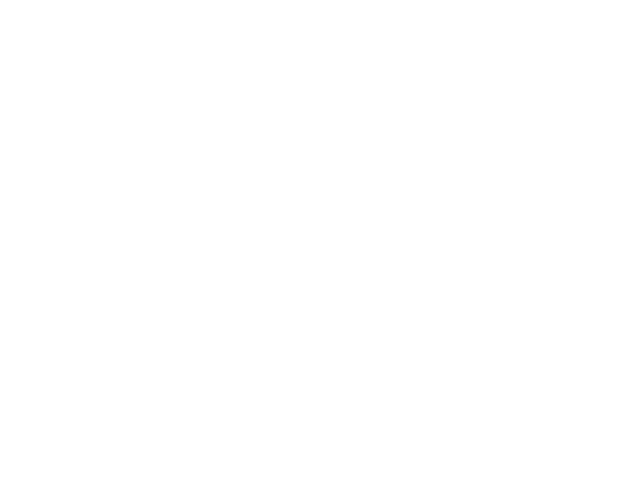

In [5]:
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot

%matplotlib notebook
with MemoryFile(dataByteArray) as memfile:
    with memfile.open() as dataset:
        plot.show((dataset,1))

### Interactive visualization

It should be run on a Chrome browser, otherwise, it might have some rendering issues.

<IPython.core.display.Javascript object>


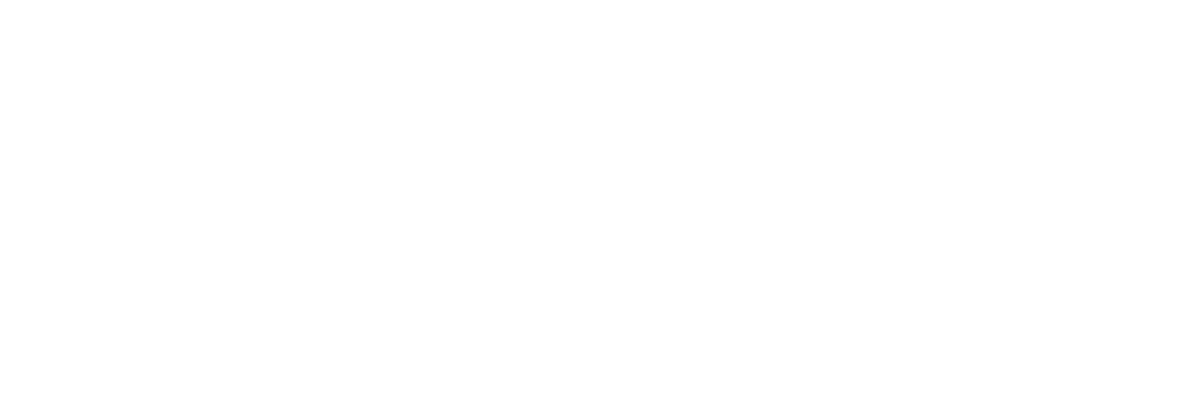

In [6]:
#Define variables so they can be re-used.
memfile = MemoryFile(dataByteArray)
dataset = memfile.open()

%matplotlib notebook       
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(12, 4), sharex=True, sharey=True)
plot.show((dataset, 1), title='band 1', ax=axr)
#plot.show((dataset, 2), title='band 2', ax=axg)
#plot.show((dataset, 3), title='band 3', ax=axb)

### Histogram

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


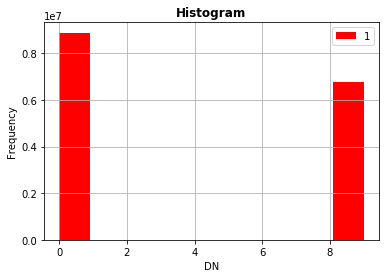

In [7]:
%matplotlib inline
plot.show_hist(dataset)#, bins=250)